# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Iqbal
- **Email:** -
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana dampak kondisi cuaca (hujan/cerah) terhadap tingkat polusi udara (PM2.5) pada setiap musim?
- Pertanyaan 2: Sumber angin dari arah mana yang membawa dampak polusi (PM2.5) tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
files = glob.glob('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


**Insight:**
- Data terdiri merupakan kondisi udara di stasiun Nongzhanguan selama beberapa bulan. Parameter yang digunakan adalah PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WD dan WSPM.


### Assessing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

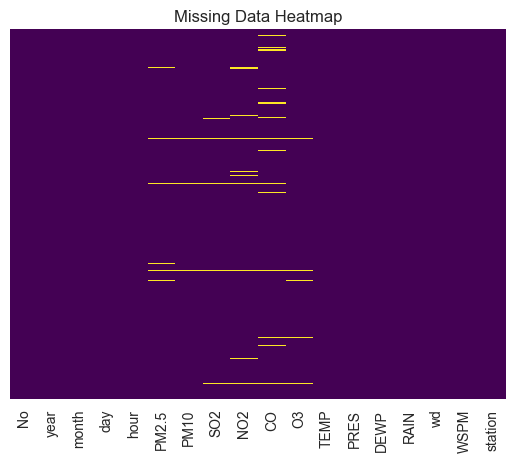

In [7]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

**Insight:**
- Terdapat beberapa data kosong, terbanyak pada CO mencapai sekitar 2% dari data.
- Pada PM2.5, PM10, O3 dan CO jarak antara 75% dan maximum value terlampau jauh.

### Cleaning Data

In [8]:
cols = ["PM2.5", "PM10", "SO2", "NO2", "O3", "CO"]
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])
df = df.set_index("datetime")
df = df.sort_index()
for col in cols:
    df[col] = df[col].transform(lambda x: x.interpolate(method="time", limit_direction='both'))
df = df.reset_index()

In [9]:
df = df.dropna(subset=['PM2.5', 'PM10'])
df = df.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN'])


In [10]:
df.isna().sum()

datetime     0
No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd          64
WSPM         0
station      0
dtype: int64

In [11]:
cols = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
df = df.set_index("datetime")
df = df.sort_index()
for col in cols:
    df[col] = df[col].transform(lambda x: x.interpolate(method="time", limit_direction='both'))
df = df.reset_index()

In [12]:
df["wd"] = df["wd"].fillna("Unknown")
df.to_csv("dashboard/data.csv", index=False)
df

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35039,2017-02-28 19:00:00,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35040,2017-02-28 20:00:00,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35041,2017-02-28 21:00:00,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35042,2017-02-28 22:00:00,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


In [13]:
df[df["wd"] == "Unknown"]

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
20851,2015-07-17 21:00:00,20854,2015,7,17,21,53.0,63.0,4.0,48.0,1300.0,90.0,23.700,1002.3,21.6,0.0,Unknown,0.1,Nongzhanguan
23033,2015-10-16 19:00:00,23036,2015,10,16,19,285.0,285.0,26.0,138.0,2600.0,91.0,16.700,1012.6,12.6,0.0,Unknown,0.2,Nongzhanguan
23057,2015-10-17 19:00:00,23060,2015,10,17,19,354.0,354.0,16.0,184.0,2700.0,29.0,16.000,1013.6,13.3,0.0,Unknown,0.1,Nongzhanguan
23354,2015-10-30 04:00:00,23357,2015,10,30,4,10.0,16.0,5.0,54.0,400.0,4.0,0.700,1026.7,-3.8,0.0,Unknown,0.2,Nongzhanguan
25754,2016-02-07 04:00:00,25757,2016,2,7,4,65.0,65.0,30.0,78.0,2000.0,10.0,-5.900,1018.7,-14.2,0.0,Unknown,0.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,2017-01-28 18:00:00,34315,2017,1,28,18,220.0,260.0,50.0,54.0,2700.0,18.0,0.625,1016.0,-7.9,0.0,Unknown,0.5,Nongzhanguan
34314,2017-01-29 14:00:00,34335,2017,1,29,14,12.0,39.0,4.0,8.0,300.0,68.0,-1.220,1025.0,-21.6,0.0,Unknown,6.5,Nongzhanguan
34540,2017-02-08 00:00:00,34561,2017,2,8,0,106.0,115.0,14.0,74.0,1900.0,3.0,-2.800,1026.3,-7.0,0.0,Unknown,0.2,Nongzhanguan
34618,2017-02-11 06:00:00,34639,2017,2,11,6,9.0,14.0,6.0,39.0,400.0,33.0,-4.600,1025.0,-18.1,0.0,Unknown,0.2,Nongzhanguan


**Insight:**
- Isi data kosong pada "PM2.5", "PM10", "SO2", "NO2", "O3", "CO", "TEMP", "PRES", "DEWP", "RAIN", "WSPM" dengan interpolation berdasarkan waktu.
- Isi data kosong pada WD dengan "Unknown".
- Hapus data jika PM2.5 dan PM10 kosong, serta hapus data jika TEMP, PRES, DEWP, RAIN kosong.

## Exploratory Data Analysis (EDA)

#### Mencari korelasi antara cuaca(hujan/cerah) terhadap PM2.5 di setiap musim.

In [14]:
df.describe(include="all")

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35044,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044.000000,35044,35044.000000,35044
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Nongzhanguan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35044
mean,2015-03-01 03:34:57.294829312,17524.582582,2014.661540,6.524455,15.726487,11.499486,85.082314,109.388921,18.760108,58.102755,1327.663609,58.432695,13.671490,1012.547419,2.447535,0.064020,NaN,1.860629,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 00:45:00,8761.750000,2014.000000,4.000000,8.000000,5.000000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,2015-03-01 03:30:00,17524.500000,2015.000000,7.000000,16.000000,11.000000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,2016-02-29 04:15:00,26285.250000,2016.000000,10.000000,23.000000,17.000000,116.000000,149.000000,24.000000,80.000000,1600.000000,83.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN


In [15]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
df['season'] = df.index.month.map(get_season)
rainy_hours = df[df['RAIN'] >= 0.1]
dry_hours = df[df['RAIN'] == 0]
df["rainy_cond"] = df["RAIN"].apply(lambda x: "Rainy" if x > 0 else "Dry")
df.reset_index()
df[["PM2.5", "RAIN"]]

,PM2.5,RAIN
datetime,,
2013-03-01 00:00:00,5.0,0.0
2013-03-01 01:00:00,8.0,0.0
2013-03-01 02:00:00,3.0,0.0
2013-03-01 03:00:00,5.0,0.0
2013-03-01 04:00:00,5.0,0.0
...,...,...
2017-02-28 19:00:00,14.0,0.0
2017-02-28 20:00:00,18.0,0.0
2017-02-28 21:00:00,15.0,0.0


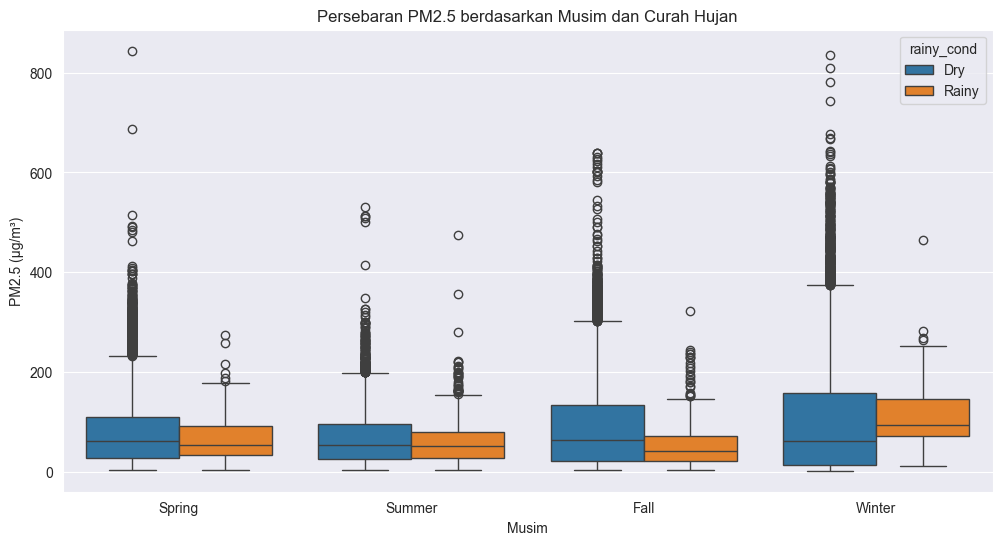

In [28]:
df['has_rain'] = df['RAIN'] > 0
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='PM2.5', hue='rainy_cond', data=df,
            order=['Spring', 'Summer', 'Fall', 'Winter'],)
plt.title('Persebaran PM2.5 berdasarkan Musim dan Kondisi Cuaca')
plt.xlabel('Musim')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

In [25]:
summary_stats = df.groupby(['season', 'has_rain'])['PM2.5'].agg(['mean', 'median', 'std', 'count'])
print("Summary:")
print(summary_stats)

Summary Statistics of PM2.5 by Season and Rain Condition:
                       mean  median         std  count
season has_rain                                       
Fall   False      92.143479    63.0   91.630946   8273
       True       54.289254    41.0   48.446741    456
Spring False      79.477094    61.0   70.504116   8631
       True       69.507463    54.0   49.284188    201
Summer False      66.842234    54.0   52.385716   8198
       True       61.333070    51.0   49.314421    634
Winter False     104.845946    62.0  117.046371   8571
       True      114.193750    94.5   76.730273     80


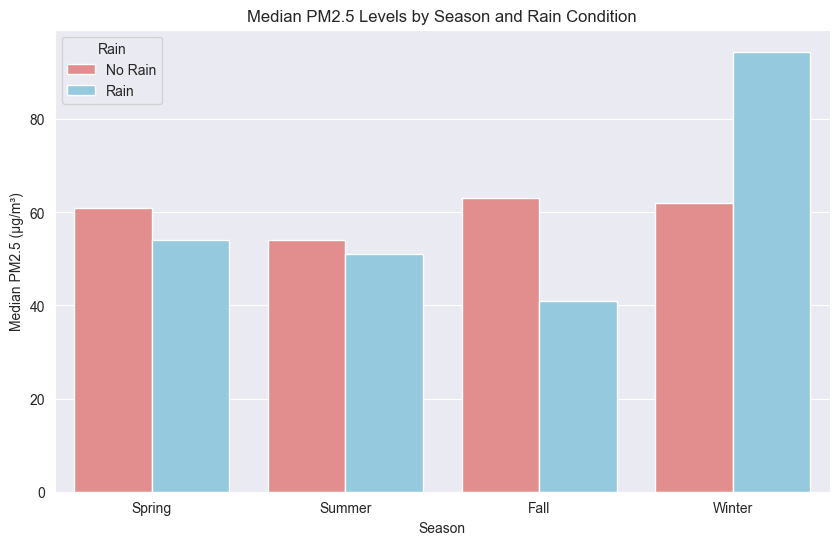

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='PM2.5', hue='has_rain', data=df,
            order=['Spring', 'Summer', 'Fall', 'Winter'],
            palette={True: 'skyblue', False: 'lightcoral'},
            estimator=np.median, errorbar=None)
plt.title('Median PM2.5 setiap musing berdasarkan Kondisi Cuaca')
plt.xlabel('Season')
plt.ylabel('Median PM2.5 (µg/m³)')
plt.legend(title='Rain', labels=['No Rain', 'Rain'])
plt.show()

#### Mencari persebaran sumber arah angin terhadap polusi PM2.5

In [34]:
pm25_wd = df.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)
pm25_wd

wd
E          114.421788
ESE        112.947732
ENE        108.595833
SE         103.101867
Unknown    100.281250
SSE         99.316797
NE          97.393704
S           92.690092
SSW         83.397318
SW          76.740824
NNE         76.398442
WSW         72.158855
W           69.278549
N           64.280305
WNW         43.051532
NNW         37.949958
NW          33.711135
Name: PM2.5, dtype: float64

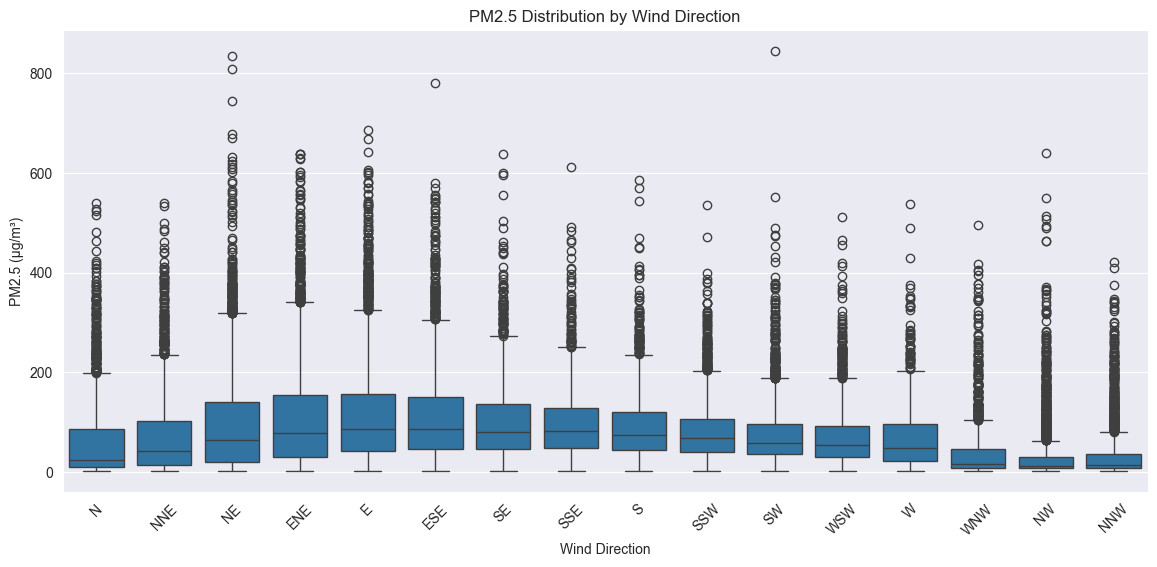

In [43]:
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
              'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
plt.figure(figsize=(14, 6))
sns.boxplot(x='wd', y='PM2.5', data=df, order=directions)
plt.title('PM2.5 Distribution by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Kondisi cuaca (hujan/cerah) mempengaruhi tingkat polusi udara (PM2.5), dengan terjadinya juga terdapat penurunan tingkat polusi udara. Namun terdapat anomali pada musim salju.
- Pada pengecekan sumber arah angin, arah angin dari timur memberi dampak polusi lebih tingi. Berdasarkan data bisa kita lihat lima teratas berasal dari E, ESE, ENE, SE dan SSE. Berbanding terbalik, pada angin dari arah barat laut yang memiliki udara cukup bersih.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana dampak kondisi cuaca(hujan/cerah) terhadap tingkat polusi udara (PM2.5)?

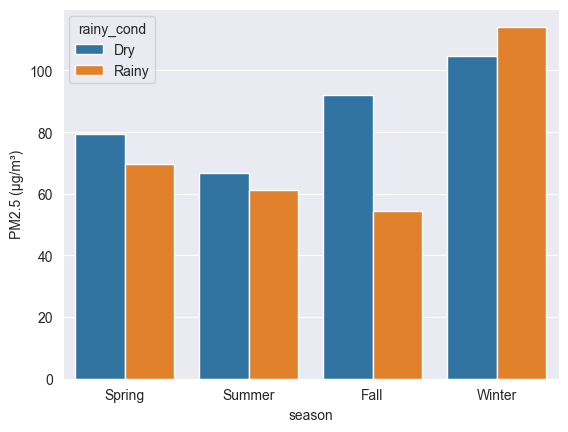

In [48]:
sns.barplot(data=df, x="season", y="PM2.5", hue="rainy_cond", errorbar=None)
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

### Pertanyaan 2:
Sumber angin dari arah mana yang membawa dampak polusi (PM2.5) tertinggi dan terendah?

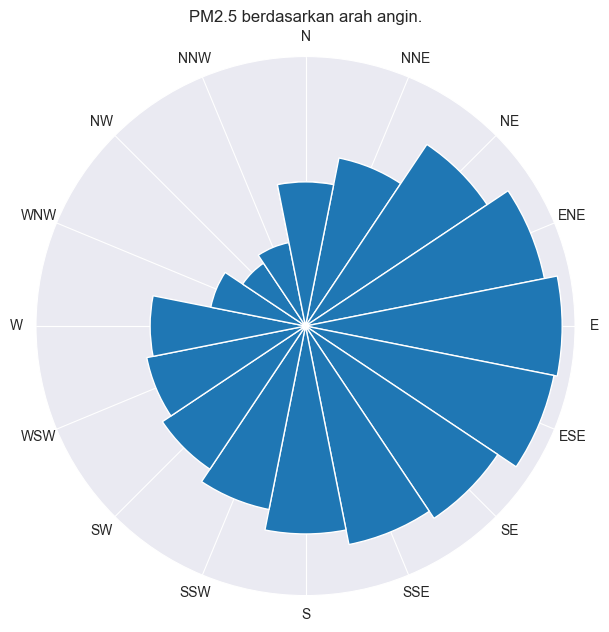

(None,
 wd
 N       64.280305
 NNE     76.398442
 NE      97.393704
 ENE    108.595833
 E      114.421788
 ESE    112.947732
 SE     103.101867
 SSE     99.316797
 S       92.690092
 SSW     83.397318
 SW      76.740824
 WSW     72.158855
 W       69.278549
 WNW     43.051532
 NW      33.711135
 NNW     37.949958
 Name: PM2.5, dtype: float64)

In [47]:
pm25_wd = pm25_wd[pm25_wd.index != 'Unknown']

pm25_wd = pm25_wd.reindex(directions)

angles = np.linspace(0, 2 * np.pi, len(pm25_wd), endpoint=False)
values = pm25_wd.values
angles = np.concatenate((angles, [angles[0]]))
values = np.concatenate((values, [values[0]]))

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": "polar"})
bars = ax.bar(angles, values, width=angles[1] - angles[0], bottom=0.0)

ax.set_yticks([])
ax.set_yticklabels([])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(pm25_wd.index)
ax.set_title("PM2.5 berdasarkan arah angin.")
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.show(), pm25_wd

## Kesimpulan

- Kondisi cuaca(hujan/cerah) dapat mempengaruhi tingkat polusi udara (PM2.5). Nilai median dan mean tercatat lebih rendah ketika terjadi hujan dibanding tidak hujan, terutama pada musim gugur nilai mean dari PM2.5 turun sebesar 40% dibanding tidak hujan. Namun, terdapat anomali pada musim salju, dimana polusi PM2.5 terlihat lebih tinggi ketika kondisi hujan.
- Angin yang datang dari arah timur memberi dampat polusi udara peling tinggi (mean: 114.421788), yang mana menunjukan terdapat kemungkinan sumber pencemaran udara di arah tersebut. Sedangkan, angin dari arah barat laut adalah yang terendah (mean: 37.949958) dan relatif memberi udara yang cukup bersih, menandakan minim sumber emisi dan polusi dari arah tersebut.